# 1-Nettoyage des données 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

# 2-Importation des données "Biblio.csv" dans un frame pandas 

In [ ]:
import pandas as pd #Import de la librairie Pandas
emprunt = pd.read_csv('/content/drive/MyDrive/Biblio.csv',sep=";") #Lecture du fichier "Biblio.csv" avec la fonction read_table de pandas
emprunt.shape #Affiche les dimensions

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(815534, 103)

# 3 - Suppression des lignes et colonnes inutiles


### 3.1 Suppression des colonnes inutiles

In [ ]:
cols = [x for x in range (emprunt.shape[1]-66)] # Suppression des 66 derniers colonnes  
emprunt = pd.read_csv('/content/drive/MyDrive/Biblio.csv', usecols=cols,sep=";")
emprunt.drop(['isbn','issn','ean','edition','ndeg','co_auteur_nom','co_auteur_prenom' ,'dates', 'auteur_secondaire_nom', 'auteur_secondaire_prenom',
              'auteur_secondaire_dates', 'auteur_collectivite', 'subdivision_auteur_collectivite', 'co_auteur_collectivite', 'subdivision_co_auteur_collectivite',
              'auteur_secondaire_collectivite', 'subdivision_auteur_secondaire_collectivite', 'cote_majoritaire',
              'nombre_de_localisations', 'nombre_d_exemplaires'], axis=1,inplace=True) #Suppression des colonnes inutiles restantes (précisément)

emprunt.shape #Affiche les dimensions

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(815534, 17)

In [ ]:
emprunt.columns #Affiche les intitulés des colonnes

Index(['ndeg_de_notice', 'langue', 'titre', 'editeur', 'date', 'format',
       'collection', 'titre_de_serie', 'auteur_nom', 'auteur_prenom',
       'auteur_dates', 'indice', 'libelle_v_smart_et_webopac',
       'nombre_de_pret_total', 'nombre_de_prets_2017',
       'nombre_de_pret_annee_2018_au_26_juillet_2018',
       'categorie_statistique_1'],
      dtype='object')

### 3.2 Suppression des x dernières lignes

In [ ]:
x = 800000
emprunt.drop(emprunt.tail(x).index,inplace=True) #Suppression des x dernières lignes
emprunt.shape #Affiche les dimensions

(15534, 17)

# 4 - Suppression des valeurs nulles

### 4.1 Remplacement des valeurs nulles par des "Nan"

In [ ]:
import numpy as np
emprunt=emprunt.replace(0.0,np.nan) # On remplace les valeurs nulles par des Nan

### 4.2 Supression des valeurs nulles

In [ ]:
print(emprunt.iloc[:,15].isnull()) #Les valeurs null prend la valeur True 
index_with_nan = emprunt.index[emprunt.iloc[:,15].isnull()] #Créer un index sur la colonne nombre_de_pret_annee_2018_au_26_juillet_2018
emprunt.drop(index_with_nan, 0, inplace=True) #Suppression des valeurs nulles 
emprunt.shape #Affiche les dimensions

0        False
1         True
2        False
3        False
4        False
         ...  
15529     True
15530     True
15531     True
15532     True
15533     True
Name: nombre_de_pret_annee_2018_au_26_juillet_2018, Length: 15534, dtype: bool


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


(9892, 17)

In [ ]:
emprunt.shape #Affiche les dimensions

(9892, 17)

# 5 - Génération des informations des utilisateurs

### 5.1 Génération des notes

In [ ]:
for row in range(len(emprunt)):
  emprunt['note']=np.random.randint(0,5, size=len(emprunt)) #Attribution d'une note aléatoire entre 0 et 5

In [ ]:
print(emprunt)

       ndeg_de_notice  ... note
0              448170  ...    0
2              448413  ...    2
3              448263  ...    1
4              448272  ...    2
6              448283  ...    0
...               ...  ...  ...
15517          208202  ...    1
15521          208301  ...    3
15523          208327  ...    0
15525          208344  ...    3
15526          208363  ...    1

[9892 rows x 18 columns]


### 5.2 Génération des noms, prenoms et mails des utilisateurs

In [3]:
import random

mylist = []
for i in range(0,400):
    x = random.randint(1,400)
    mylist.append(x)

for row in range(15527):
  emprunt['Email']="email"
  emprunt['Prenom']="prenom"
  emprunt['Nom']="name"

for row in range(15527):
  num=random.choice(mylist)
  emprunt['Prenom'][row]="Prenom"+str(num)
  emprunt['Nom'][row]="Nom"+str(num)
  emprunt['Email'][row]=str(num)+"@gmail.com"
print(emprunt)

NameError: name 'emprunt' is not defined




# 6 - Préparation des données d'apprentissage



## 6.1 Vérification des données

In [13]:
#compter les valeurs nulles
print(emprunt.isnull().sum())
#description des données
emprunt.describe()

ndeg_de_notice                                     0
langue                                           881
titre                                              0
editeur                                           58
date                                              58
format                                            59
collection                                      5278
titre_de_serie                                  8686
auteur_nom                                      2491
auteur_prenom                                   2874
auteur_dates                                    5628
indice                                          4686
libelle_v_smart_et_webopac                         0
nombre_de_pret_total                               0
nombre_de_prets_2017                            1900
nombre_de_pret_annee_2018_au_26_juillet_2018       0
categorie_statistique_1                            0
note                                               0
Email                                         

,ndeg_de_notice,nombre_de_pret_total,nombre_de_prets_2017,nombre_de_pret_annee_2018_au_26_juillet_2018,note
count,9.892000e+03,9892.000000,7992.000000,9892.000000,9892.000000
mean,7.410754e+05,162.298625,22.292042,12.917812,2.023959
std,3.515668e+05,323.515399,58.832429,43.120759,1.417189
min,1.160000e+02,1.000000,1.000000,1.000000,0.000000
25%,4.206168e+05,15.000000,3.000000,1.000000,1.000000
50%,7.419455e+05,54.000000,7.000000,3.000000,2.000000
75%,1.073543e+06,167.000000,18.000000,9.000000,3.000000
max,1.165550e+06,7211.000000,1582.000000,1956.000000,4.000000


## 6.2 Transformation des données

In [14]:
#transformation en matrice numpy seul reconnu par scikit learn
from sklearn import preprocessing

Encoder =preprocessing.LabelEncoder()
Encoder2 = preprocessing.LabelBinarizer()

#Labellisation des champ textes avec Encoder
emprunt["langue"]=Encoder.fit_transform(emprunt["langue"].astype(str))
emprunt["titre"]=Encoder.fit_transform(emprunt["titre"])
emprunt["editeur"]=Encoder.fit_transform(emprunt["editeur"].astype(str))
emprunt["date"]=Encoder.fit_transform(emprunt["date"].astype(str))
emprunt["format"]=Encoder.fit_transform(emprunt["format"])
emprunt["collection"]=Encoder.fit_transform(emprunt["collection"])
emprunt["titre_de_serie"]=Encoder.fit_transform(emprunt["titre_de_serie"])
emprunt["auteur_nom"]=Encoder.fit_transform(emprunt["auteur_nom"])
emprunt["auteur_prenom"]=Encoder.fit_transform(emprunt["auteur_prenom"])
emprunt["auteur_dates"]=Encoder.fit_transform(emprunt["auteur_dates"])
emprunt["indice"]=Encoder.fit_transform(emprunt["indice"])
emprunt["categorie_statistique_1"]=Encoder.fit_transform(emprunt["categorie_statistique_1"])
emprunt["libelle_v_smart_et_webopac"]=Encoder.fit_transform(emprunt["libelle_v_smart_et_webopac"])
emprunt["Email"]=Encoder.fit_transform(emprunt["Email"])                         
emprunt["Prenom"]=Encoder.fit_transform(emprunt["Prenom"])
emprunt["Nom"]=Encoder.fit_transform(emprunt["Nom"])

#afficher les 10 premières lignes
print(emprunt.head(10))

#afficher la liste des colonnes et leurs nouveaux types (propriété dtypes)
print(emprunt.dtypes)

    ndeg_de_notice  langue  titre  editeur  ...  note  Email  Prenom  Nom
0           448170      17   7390     3934  ...     0    176     177  177
2           448413      17   9216      569  ...     2     34      36   36
3           448263       1   8788      444  ...     1    209     209  209
4           448272      36   8105      568  ...     2    141     142  142
6           448283      17   3102     2094  ...     0    114     115  115
7           448288      17   5591     3021  ...     0     97      98   98
10          448373      17   7685       36  ...     1    204     204  204
11          448388      17   5421     2873  ...     3    124     125  125
12          448391      17   1420     3708  ...     3     88      81   81
15          448519      36   5741     1995  ...     4     12      14   14

[10 rows x 21 columns]
ndeg_de_notice                                    int64
langue                                            int64
titre                                             

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


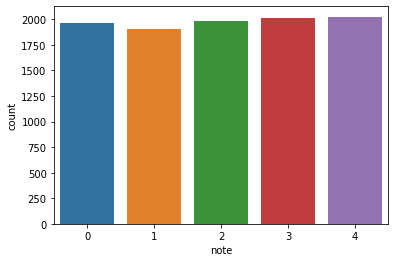

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
v=emprunt['categorie_statistique_1']
sns.countplot(v)
v=emprunt["note"]
sns.countplot(v)

## 6.3 Séparation des données input(X)/output(Y)

In [16]:
#transformer d'abord data en numpy avec la méthode to_numpy
emprunt=emprunt.replace(np.nan,0)
empruntNp=emprunt.to_numpy()

#séparation des données explicatives X et de la cible Y avec le slicing
#x=emprunt[['Nom','categorie_statistique_1','note', 'nombre_de_pret_annee_2018_au_26_juillet_2018']]
x = empruntNp[:,13:16:]
y = empruntNp[:,17:18]
#y vecteur de la var. à prédire
#y=emprunt[['titre']]
y=y.astype(int)
#vérifer les types la structure
print(x.shape, y.shape)
print(y)


(9892, 3) (9892, 1)
[[0]
 [2]
 [1]
 ...
 [0]
 [3]
 [1]]


## 6.4 Scaling des données

In [17]:
#importer le module preprocessing
from sklearn import preprocessing

#Normaliser les donnes
x_normalized=preprocessing.StandardScaler().fit_transform(x)

#Mise à l'échelle 0-1
x_scaled=preprocessing.MinMaxScaler().fit_transform(x)

## 6.5 Découpage des données train/test

In [18]:
#importation du module model_selection de scikit learn
from sklearn import model_selection
from sklearn.model_selection import train_test_split

#Subdivision des données en données train et test avec la fonction train_test_split du module model_selection de pandas

x_train,x_test,y_train,y_test = model_selection.train_test_split(x_scaled,y,test_size = 0.80,random_state=0)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
pd.DataFrame(x_train).head()

(1978, 3) (7914, 3) (1978, 1) (7914, 1)


,0,1,2
0,0.002774,0.000632,0.000000
1,0.089736,0.023388,0.010230
2,0.027739,0.041087,0.015857
3,0.097920,0.025284,0.005115
4,0.007490,0.008850,0.003069


# 7- Classifications

## 7.1 Kmeans

In [ ]:
#clustering
#k-means sur les données des fromages
#importer les librarires cluster et pyplot (as plt)
from sklearn import cluster
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
import numpy as np
#création d'un clusetr Kmean avec nombre de clusters 4 :n_clusters=4
kmean=cluster.KMeans()
#Apprentissage (segmetation) (fonction fit)
kmean.fit(x_test)
#kmean.fit(emprunt['nombre_de_pret_annee_2018_au_26_juillet_2018'])
#Prédiction et enregistrement des labels 
labels=kmean.predict(x_test)
#Affichage des labels
print(labels)
#return numero de cluster pour chaque entré
#enregistrement des centres des clusters
#centresKM=kmean.cluster_centers_
#print(centreKM)
#plt.scatter(centresKM[:,0],centresKM[:,1], s=60,marker='^',linewidth=2)

[1 3 1 ... 1 1 1]


## 7.2 - RandomForestClassifier

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

emprunt_rf= RandomForestClassifier() #création d'une instance de la classe

#affichage des paramètres (paramètres par défaut ici c.à d. noyau ‘ rbf
print(emprunt_rf)

#exécution de l'instance sur les données d'apprentissage
emprunt_rf.fit(x_train,y_train)

#appliquer le modèle sur les données test
y_pred_rfc=emprunt_rf.predict(x_test)

#Calculer les scores des modèles
emprunt_rf_score=metrics.accuracy_score(y_pred_rfc,y_test)
emprunt_rf_precision=precision_score(y_pred_rfc,y_test,average="micro")
emprunt_rf_recall=recall_score(y_pred_rfc,y_test,average="micro")

#Afficher les scores. Que remarquez vous?
print(emprunt_rf_score)
print(emprunt_rf_precision)
print(emprunt_rf_recall)

#création et affichage de la matrice de confusion
conf_rf = confusion_matrix(y_pred_rfc,y_test)
print(conf_rf)

RandomForestClassifier()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


[0 0 0 ... 4 2 2]
0.20444781400050543
0.20444781400050543
0.20444781400050543
[[308 285 292 274 303]
 [245 264 294 310 304]
 [377 384 379 376 352]
 [288 249 279 322 309]
 [362 345 334 334 345]]


## 7.3 Classification par les SVM

paramètre par défaut : rbf
SVC()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.2004043467273187
0.2004043467273187
0.2004043467273187
[[ 400  372  348  371  389]
 [  78   94   83   93   88]
 [   0    0    1    0    0]
 [1038 1036 1067 1038 1073]
 [  71   82   63   76   53]]


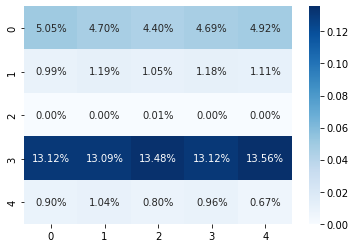

In [ ]:
#importer la classe SVC
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
 #instanciation de l’objet svm_model
svm_model= SVC()

#affichage des paramètres (paramètres par défaut ici c.à d. noyau ‘ rbf
print("paramètre par défaut :",svm_model.kernel)

print(svm_model)

#exécution de l'instance sur les données d'apprentissage
svm_model.fit(x_train,y_train)

#appliquer le modèle sur les données test
y_pred_svm=svm_model.predict(x_test)

#Calculer les scores des modèles
emprunt_rf_score=metrics.accuracy_score(y_pred_svm,y_test)
emprunt_rf_precision=precision_score(y_pred_svm,y_test,average="micro")
emprunt_rf_recall=recall_score(y_pred_svm,y_test,average="micro")

#Afficher les scores. Que remarquez vous?
print(emprunt_rf_score)
print(emprunt_rf_precision)
print(emprunt_rf_recall)

#création et affichage de la matrice de confusion
conf = confusion_matrix(y_pred_svm, y_test) 
print(conf)

#Pourcentage des datas dans chaque quadrant
import seaborn as sns
sns.heatmap(conf/np.sum(conf), annot=True, 
            fmt='.2%', cmap='Blues')
        

# 8 - Validation des modéles 


  -------- Méthode  RFC -------- 

Precision(FPR) RFC : 
 [0.20162225 0.18590187 0.19543726 0.1947644  0.19591029]

 Recall(TPR) RFC : 
 [0.21928166 0.16982323 0.16453265 0.23574144 0.1852776 ]

  Recall(TPR) SVM : 
 [2.52047889e-01 5.93434343e-02 6.40204866e-04 6.57794677e-01
 3.30630069e-02]

  Precision(FPR) SVM : 
 [0.21276596 0.21559633 1.         0.19763899 0.15362319]
CM LR : 
 [[348 286 244 389 320]
 [375 269 267 370 303]
 [332 286 257 394 293]
 [317 325 261 372 303]
 [354 281 286 385 297]]
CM SVM : 
 [[ 400   78    0 1038   71]
 [ 372   94    0 1036   82]
 [ 348   83    1 1067   63]
 [ 371   93    0 1038   76]
 [ 389   88    0 1073   53]]

 Courbe de score  



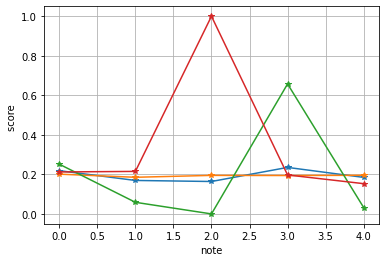

In [ ]:
#Importer le module metric
from sklearn import metrics
#Importer le Pyplot
import matplotlib.pyplot as plt  
import seaborn as sns
#Calculer les scores des modèles
 
#Calculer les scores pour RL
TPR_RFC = metrics.recall_score(y_true=y_test, y_pred=y_pred_rfc, average=None )
FPR_RFC = metrics.precision_score(y_true=y_test, y_pred=y_pred_rfc, average=None )
print("\n"," -------- Méthode  RFC --------","\n" )
print("Precision(FPR) RFC :","\n", FPR_RFC)
print("\n","Recall(TPR) RFC :","\n", TPR_RFC)
 
#Calculer les scores pour SVM
TPR_SVM = metrics.recall_score(y_true=y_test, y_pred=y_pred_svm, average=None)
FPR_SVM = metrics.precision_score(y_true=y_test, y_pred=y_pred_svm, average=None)
 
print("\n"," Recall(TPR) SVM :","\n", TPR_SVM)
print("\n"," Precision(FPR) SVM :","\n", FPR_SVM)
 
#Afficher les matrices de confusion des modèles
CM_RFC = metrics.confusion_matrix(y_test, y_pred_rfc)
CM_SVM = metrics.confusion_matrix(y_test, y_pred_svm)
 
 
print("CM LR :","\n", CM_RFC)
print("CM SVM :","\n",CM_SVM)
#Ajouter tous les scores à une liste
list_scoresTPR = [TPR_RFC, FPR_RFC , TPR_SVM, FPR_SVM  ]
 
#Importer Pyplot
import matplotlib.pyplot as plt
#Afficher la liste des scores dans une courbe
for scores in list_scoresTPR:  plt.plot(scores, "*-",)
 
plt.grid()
plt.xlabel("note")
plt.ylabel("score ")
print("\n", "Courbe de score ","\n")

NameError: ignored